## Libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
import pickle
import one_hot
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Data

In [35]:
unpickle_test = open('/Users/biancaorozco/Desktop/Metis/project5/math/data/outputs/test/test.pickle', 'rb')
test_data = pickle.load(unpickle_test)

In [90]:
os.chdir('/Users/biancaorozco/Desktop/Metis/project5/math/data')
df_train = pd.read_csv('df_train.csv')
df_test = pd.read_csv('df_test.csv')

### Split Train/Validate Data

In [30]:
Xtrain, Xval, ytrain, yval = train_test_split(df_train.drop('target', axis=1), df_train['target'], test_size=0.2, random_state = 33)

## Modeling

In [68]:
rf = RandomForestClassifier(n_estimators=500,max_depth = 9)
rf.fit(Xtrain, ytrain)
ypred_val = rf.predict(Xval)
print('Random Forest Accuracy Score: ', accuracy_score(yval, ypred_val))

Random Forest Accuracy Score:  0.74125


In [69]:
# Checking for Overfitting
ypred_train = rf.predict(Xtrain)
print('Predicting on Training Data\nChecking for Overfitting: ', accuracy_score(ytrain, ypred_train))

Predicting on Training Data
Checking for Overfitting:  0.844


## Testing

### Predicting *i*

This is the label for my test image: ** i **
This is the drawn image:


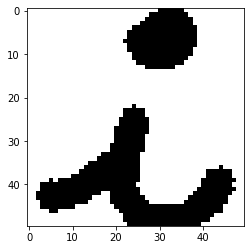

In [102]:
classes = open('classes.txt', 'r').read().split()
print('This is the label for my test image: **', one_hot.decode(test_data[1]['label'], classes), '**')

feature1 = test_data[1]['features']
feature1.reshape(50,50)
print('This is the drawn image:')
plt.imshow(feature1.reshape(50,50), cmap = 'gray');

In [73]:
print('Random Forest Prediction only using Image:\n', rf.predict([feature1]))

Random Forest Prediction only using Image:
 ['i']


### Predicting *z*

This is the label for my test image: ** z **
This is the drawn image:


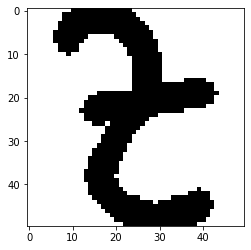

In [76]:
classes = open('classes.txt', 'r').read().split()
print('This is the label for my test image: **', one_hot.decode(test_data[3]['label'], classes), '**')

feature3 = test_data[3]['features']
feature3.reshape(50,50)
print('This is the drawn image:')
plt.imshow(feature3.reshape(50,50), cmap = 'gray');

In [77]:
print('Random Forest Prediction only using Image:\n', rf.predict([feature3]))

Random Forest Prediction only using Image:
 ['z']


### Test Set

In [98]:
Xtest = df_test.drop('target', axis=1)
ytest = df_test['target']
print(rf.predict(Xtest.head(10)))
print(ytest.head(10))

['1' 'i' '=' 'z' '2' ')' '(' '1' '6' 'o']
0    1
1    i
2    =
3    z
4    z
5    )
6    (
7    1
8    6
9    0
Name: target, dtype: object
